# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Time Series Exploratory Data Analysis In Python </center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;"> A practical guide for time series data analysis in Python Pandas </center></p>
​

***


Time series data is one of the most common data types in the industry and you will probably be working with it in your career. Therefore understanding how to work with it and how to apply analytical and forecasting techniques are critical for every aspiring data scientist. In this notebook we will explore how to understand your time series data and prepare it for forecasting tasks using statistical techniques, machine, and deep learning techniques.

#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Correlation and Autocorrelation</a>
         <ul>
            <li><a href="#1.1" target="_self" rel=" noreferrer nofollow">1.1  Simple Linear Regression</a></li>
            <li><a href="#1.2" target="_self" rel=" noreferrer nofollow">1.2 Autocorrelation</a></li>
            <li><a href="#1.3" target="_self" rel=" noreferrer nofollow">1.3 Autocorrelation Function</a></li>
        </ul> 
    </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Time Series Models</a>
                    <ul>
            <li><a href="#2.1" target="_self" rel=" noreferrer nofollow">2.1  White Noise</a></li>
            <li><a href="#2.2" target="_self" rel=" noreferrer nofollow">2.2 Random Walk</a></li>
            <li><a href="#2.3" target="_self" rel=" noreferrer nofollow">2.3 Stationary</a></li>
        </ul> 
    </li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Autoregressive (AR) Models</a>
                    <ul>
            <li><a href="#3.1" target="_self" rel=" noreferrer nofollow">3.1  AR Models Definition</a></li>
            <li><a href="#3.2" target="_self" rel=" noreferrer nofollow">3.2 Estimating & Forecasting AR Models</a></li>
            <li><a href="#3.3" target="_self" rel=" noreferrer nofollow">3.3 Choosing the Right Model</a></li>
        </ul>     
    </li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Moving Average (MA) and ARMA Models</a>
                <ul>
            <li><a href="#4.1" target="_self" rel=" noreferrer nofollow">4.1  Moving Average Model Definition</a></li>
            <li><a href="#4.2" target="_self" rel=" noreferrer nofollow">4.2 4.2. Estimation of MA Model
</a></li>
            <li><a href="#4.3" target="_self" rel=" noreferrer nofollow">4.3 ARMA Models</a></li>
        </ul> 
            </li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Case Study: Climate Change</a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. References</a></li>

    
</ul>

</div>


***

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Correlation and Autocorrelation </b></div>

In this section, you’ll be introduced to the ideas of correlation and autocorrelation for time series. Correlation describes the relationship between two-time series and autocorrelation describes the relationship of a time series with its past values.

1.1. Correlation of Two Time Series
The correlation of the two-time series measures how they vary with each other. The correlation coefficient summarizes this relation in one number. A correlation of one means that the two series have a perfect linear relationship with no deviations. High correlations mean that the two series strongly vary together. A low correlation means they vary together, but there is a weak association. And a high negative correlation means they vary in opposite directions, but still with a linear relationship.

There is a common mistake when calculating the correlation between two trending time series. Consider two-time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That’s why, when you look at the correlation of say, two stocks, you should look at the correlation of their returns, not their levels.

In the example below, the two series, stock prices, and UFO sightings, both trend up over time. Of course, there is no relationship between those two series, but the correlation is 0.94. But if you compute the correlation of percent changes, the correlation goes down to approximately zero.



In [1]:
import pandas as pd
# Compute correlation of levels
# data used is levels
levels = pd.read_csv('/kaggle/input/dji-dataset/DJI.csv', parse_dates=['Date'], index_col='Date')

correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)


Correlation of levels:  0.9204594155244163
Correlation of changes:  0.009287288259357323


The figure below shows that the two series are correlated when plotted with time. The reason for this as mentioned is that they are both trending series.


<Axes: xlabel='Date'>

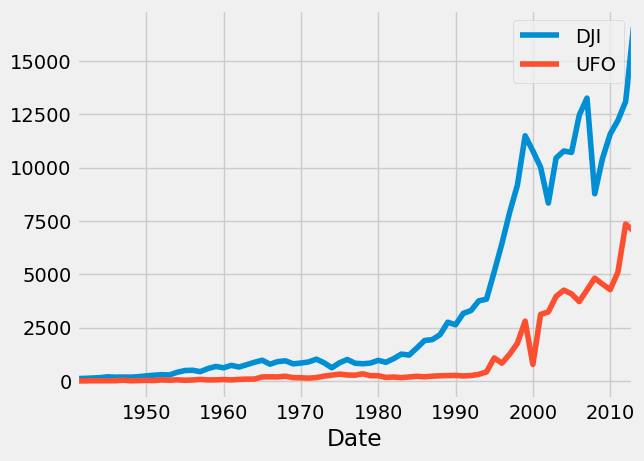

In [2]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

levels.plot()

<a id="1.1"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 1.1 Regression</b></div>


A simple linear regression for time series finds the slope, beta, and intercept, alpha, of a line that’s the best fit between a dependent variable, y, and an independent variable, x. The x’s and y’s can be two-time series.

Regression techniques are very common, and therefore there are many packages in Python that can be used. In statsmodels, there is OLS. In numpy, there is polyfit, and if you set degree equals 1, it fits the data to a line, which is a linear regression. Pandas have an ols method, and scipy has a linear regression function. Beware that the order of x and y is not consistent across packages.

In the example below, we will regret the values of the oil prices using the sp500 as an independent variable. You need to add a column of ones as a dependent, right-hand side variable. The reason you have to do this is that the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method “add constant” is a simple way to add a constant.

In [3]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y

data = pd.read_csv('/kaggle/input/price-dataset/price.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
x = data['SP500']
y = data['Oil']

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y.values, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())


The correlation between x and y is -0.35
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     336.5
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.44e-70
Time:                        10:15:27   Log-Likelihood:                -11214.
No. Observations:                2469   AIC:                         2.243e+04
Df Residuals:                    2467   BIC:                         2.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

The coef contains the slope and the intercept of the regression analysis. Since the two variables are negatively correlated the slope is negative. The second important statistic to take note of is the R-Squared which is 0.12. The R-squared measures how well the linear regression line fits the data. There is a relation between the correlation and the R-squared. The magnitude of the correlation is the square root of the R-squared. And the sign of the correlation is the sign of the slope of the regression line.

<a id="1.2"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 1.2 Autocorrelation</b></div>


Autocorrelation is the correlation of a single time series with a lagged copy of itself. It’s also called serial correlation. Often, when we refer to a series’s autocorrelation, we mean the “lag-one” autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

positive autocorrelation, which is also known as trend following, means that the increase observed in a time interval leads to a proportionate increase in the lagged time interval. While negative autocorrelation, which is known as mean-reverting, means that if a particular value is above average the next value (or for that matter the previous value) is more likely to be below average. The figure below shows an example of both of them.

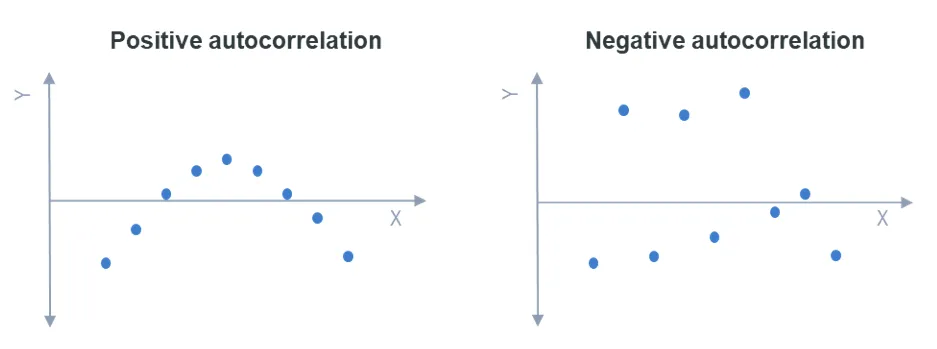

The autocorrelation of time series has many real-world applications. Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. Since stocks have historically had negative autocorrelation over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up. For other assets like commodities and currencies, they have historically had positive autocorrelation over horizons of several months, so the typical hedge fund strategy there is to buy commodities that have gone up in the last several months and sell those commodities that have gone down.



<a id="1.3"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 1.3 Autocorrelation Function</b></div>

The autocorrelation function (ACF) is the autocorrelation as a function of the lag. Any significant non-zero autocorrelations imply that the series can be forecast from the past. It can be which values you should rely on to forecast the values in the future, discover seasonal earnings by observing the autocorrelation function at these seasons, and can be used for selecting a model for fitting the data as will be shown in section 3.

**plot_acf** is the statsmodels function for plotting the autocorrelation function. The input x is a series or array. The argument lags indicate how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval. For example, if alpha equals 0.05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. You will get a wider confidence interval if you set alpha lower, or if you have fewer observations.



[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


/tmp/ipykernel_20/3092837715.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  HRB = pd.read_csv('/kaggle/input/hrb-data/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')


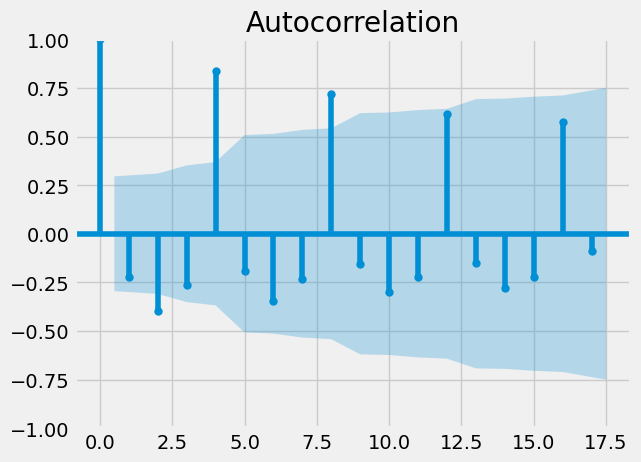

In [4]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB = pd.read_csv('/kaggle/input/hrb-data/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=0.05)
plt.show()

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Time Series Models </b></div>


In this section, you’ll learn about some simple time series models. These include white noise and a random walk.



<a id="2.1"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 2.1 White Noise Function</b></div>


White noise is the series with constant mean and variance with time and zero autocorrelation at all lags. There are several special cases of white noise. For example, if the data is white noise but also has a normal, or Gaussian, distribution, then it is called Gaussian White Noise.


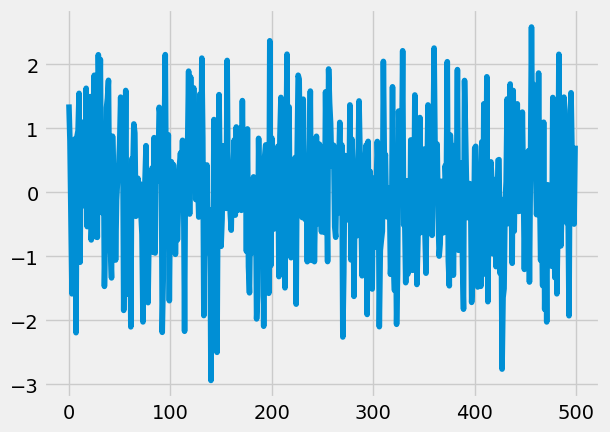

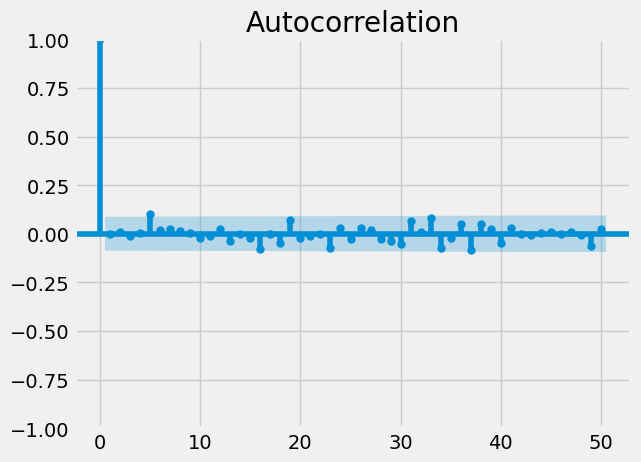

In [5]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)
plt.show()
plot_acf(noise, lags=50)
plt.show()

**The autocorrelation of the white noise:**

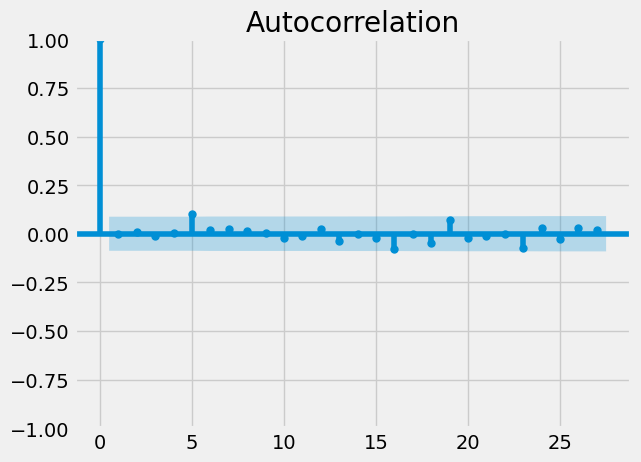

In [6]:
acf_array = acf(noise)

# Plot the acf function
plot_acf(noise, alpha=0.05)
plt.show()

<a id="2.2"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 2.2.  Random Walk</b></div>

In a random walk, today's price is the same as yesterday's price in addition to white noise.

P(t) = P(t-1) + white-noise

Therefore the change in the price is white noise. Since we cannot forecast the white noise, the best forecast for today's price will be yesterday's price.

To test whether a time series follows a random walk or not, we can regress the current value (for example the price) with the lagged values. If the slope coefficient is significantly less than one, we can reject the null hypothesis (series follows a random walk). If it is not significantly different from one, we cannot reject the null hypothesis.

Another way to do it is to regress the difference in values on the lag values and test the slope coefficient to be zero instead of one. This is known as the Dickey-Fuller test and if more lagged values are added it will be called the **Augmented Dickey-Fuller (ADF)** test.

The example below shows how to apply this test to the SP500 data in python using the statsmodels library.

In [7]:
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv('/kaggle/input/price-dataset/price.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
SPX = data['SP500']
results = adfuller(SPX)
print(results[1]) # print the p-value 


0.9813657668194148


The p-value is 0.9 which means that the difference is not significant and we cannot reject the null hypothesis therefore the SP500 time series follows a random walk.



<a id="2.3"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 2.3.  Stationary</b></div>


Stationery signals are the signals that their joint distribution does not depend on time. A more practical definition is the weak stationery definition which means that the mean, variance, and autocorrelation of the signal do not depend on time.

Stationery is a very important concept in time series analysis and forecasting. The reason for this is that if the series is not stationary we would not be able to model and forecast it. The main task of the modeling step is estimating a set of parameters that could be used for the required tasks such as forecasting. If the series is non-stationary, its parameters will be changing over time so you will not be able to model it. A random walk is a common type of non-stationary series. The variance grows with time. For example, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now. Seasonal series are also non-stationary.

Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary.

In the example below the S&P 500 prices which is a non-stationary random walk, the signal is transformed into a stationary white noise signal by taking the first difference.

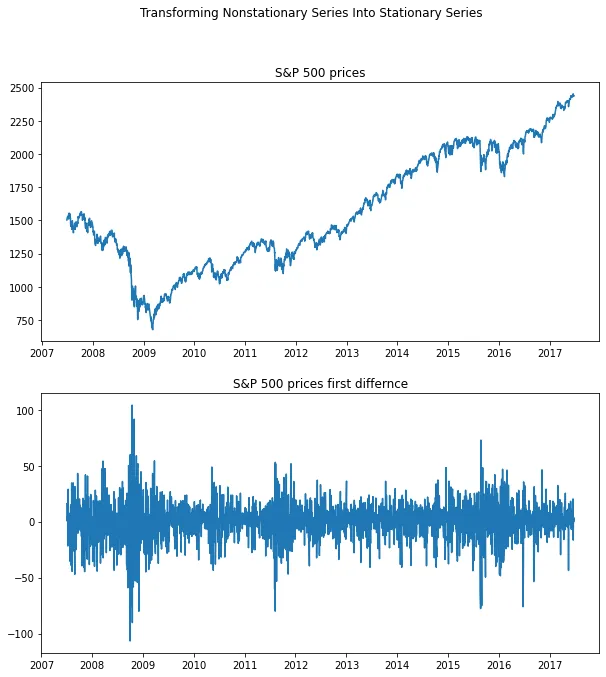

The example below is for the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with a lag of 4, the transformed series looks stationary.

Text(0.5, 1.0, 'Quarterly earnings for H&R Block seasonal difference')

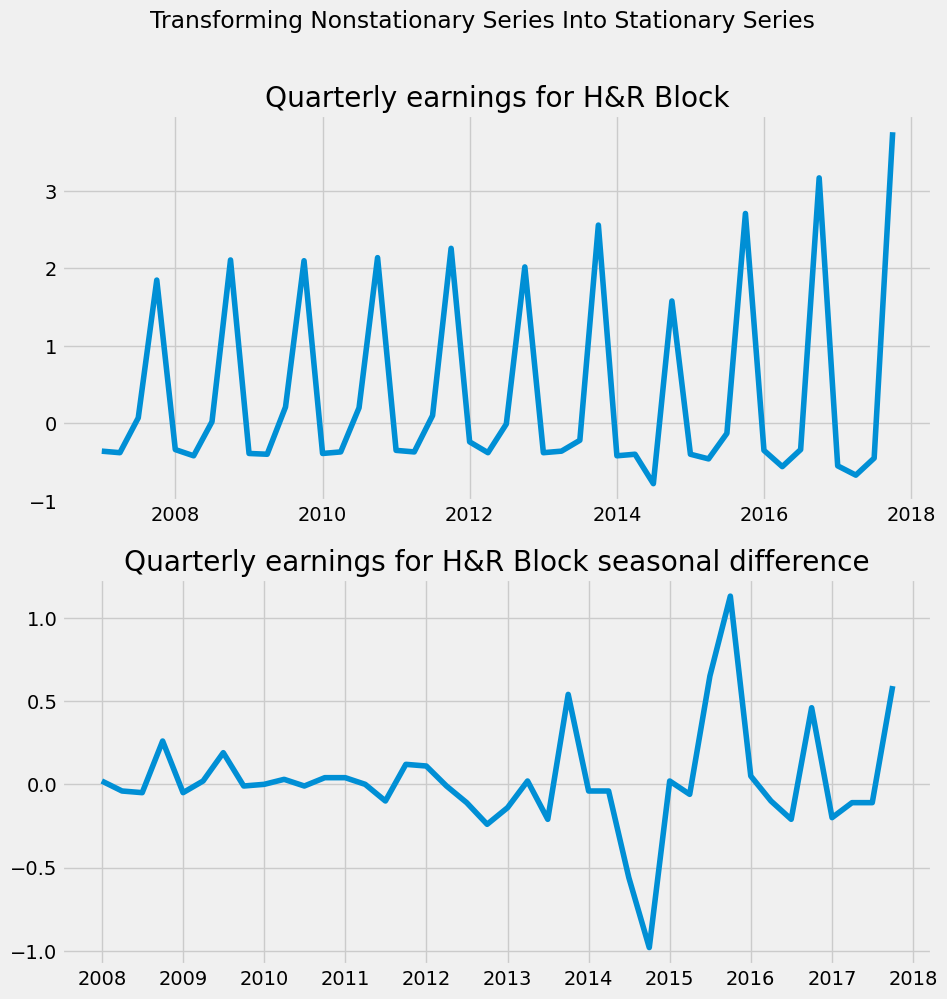

In [8]:
# Transforming Nonstationary Series Into Stationary Series
fig, axs = plt.subplots(2)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(HRB)
axs[0].set_title('Quarterly earnings for H&R Block')

axs[1].plot(HRB.diff(4))
axs[1].set_title('Quarterly earnings for H&R Block seasonal difference')


The last example is Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, We will take only the log of the series to eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, the transformed series looks stationary.



Text(0.5, 1.0, 'Seasonal differnce of Amazon quarterly revenue log')

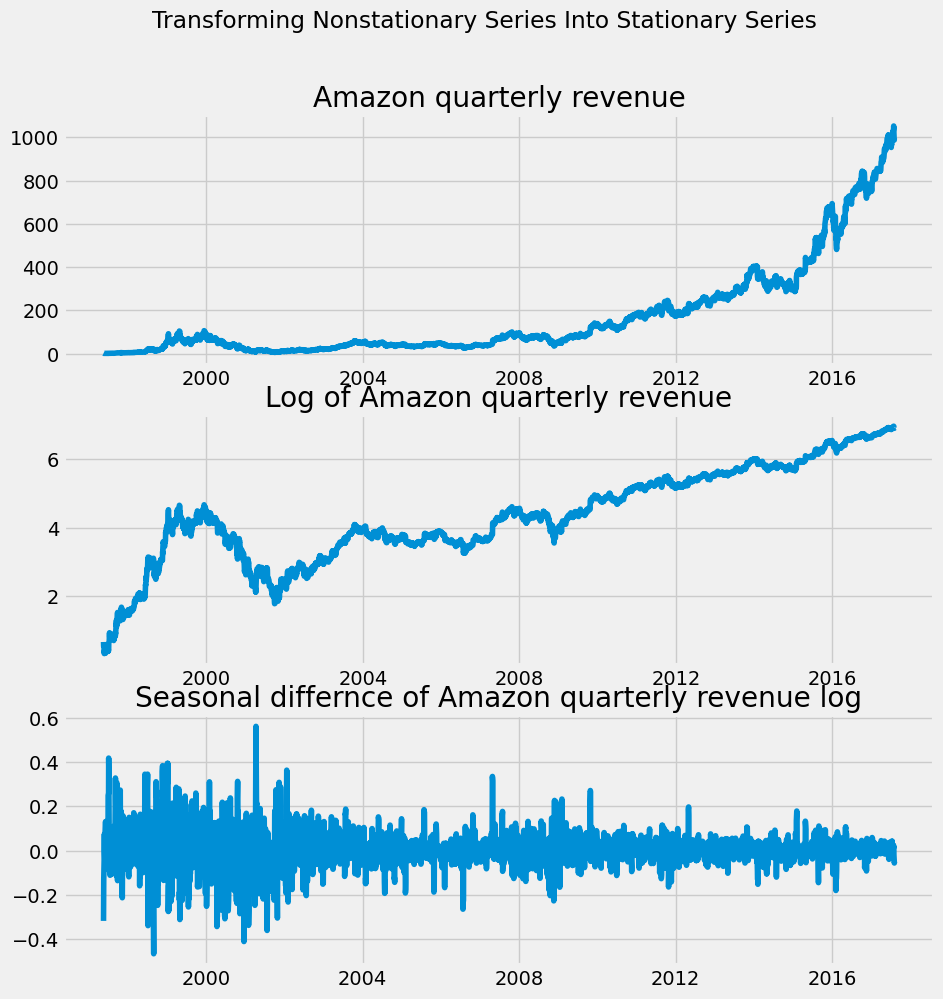

In [9]:
# Transforming Nonstationary Series Into Stationary Series
AMZN =  pd.read_csv('/kaggle/input/amazon/AMZN.csv', parse_dates=['Date'], index_col='Date')

fig, axs = plt.subplots(3)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(AMZN)
axs[0].set_title('Amazon quarterly revenue')
axs[1].plot(np.log(AMZN))
axs[1].set_title('Log of Amazon quarterly revenue')

axs[2].plot(np.log(AMZN).diff(4))
axs[2].set_title('Seasonal differnce of Amazon quarterly revenue log')

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Autoregressive (AR) Models </b></div>


In this section, we will explain the autoregressive, or AR, models for time series. These models use past values of the series to predict the current value.


<a id="3.1"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 3.1.  AR Models Definition</b></div>

An autoregressive (AR) model predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.

In the AR model, today's value is equal to the fraction (phi) of yesterday's value in addition to noise and the mean as shown in the equation below:

R(t) = mean + phi*R(t-1) + noise.

Since we only look at one previous step in time then this is AR(1) model, the model can be extended to include more lagged values and more phi parameters. Here we show an AR(1), an AR(2), and an AR(3).

If phi is equal to one, then the series will represent a random walk as discussed in the previous section and if it is zero it will be white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1. If phi has a negative value then a positive return last period, at time t-1, implies that this period’s return is more likely to be negative. We referred to this as mean reversion in section 1.3. If phi has a positive value, then a positive return last period implies that this period’s return is expected to be positive. We referred to this as momentum in section 1.3.

The example below shows four simulated time series with different phi values (0.9, -0.9, 0.5,-0.5):

Text(0.5, 1.0, 'Simulated data with Phi = -0.5')

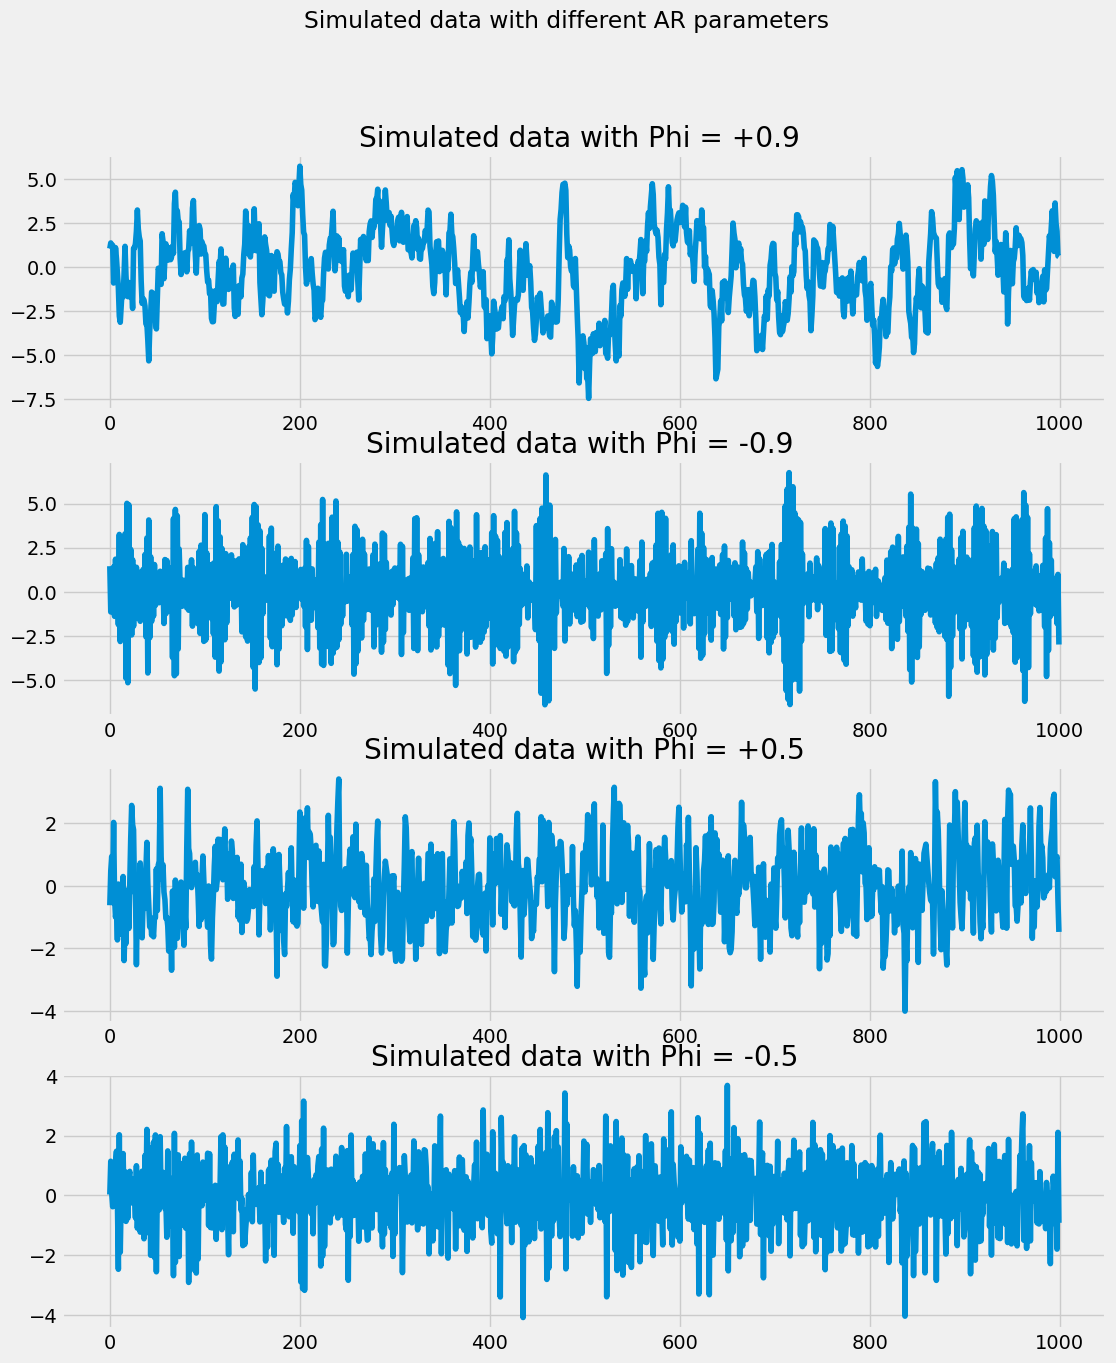

In [10]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

fig, axs = plt.subplots(4)
fig.set_size_inches(12, 14.5)
fig.suptitle('Simulated data with different AR parameters')

# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
axs[0].plot(simulated_data_1)
axs[0].set_title('Simulated data with Phi = +0.9 ')

# Plot 2: AR parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
axs[1].plot(simulated_data_2)
axs[1].set_title('Simulated data with Phi = -0.9 ')


# Plot 3: AR parameter = +0.5
ar3 = np.array([1, -0.5])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
axs[2].plot(simulated_data_3)
axs[2].set_title('Simulated data with Phi = +0.5')


# Plot 3: AR parameter = -0.5
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
axs[3].plot(simulated_data_4)
axs[3].set_title('Simulated data with Phi = -0.5')


When phi is 0.9, it looks close to a random walk. When phi equals -0.9, the process has a large positive value is usually followed by a largely negative one. The bottom two are similar but are less exaggerated and closer to white noise.

To have better understanding let's look at the autocorrelation function of these four simulated time series:



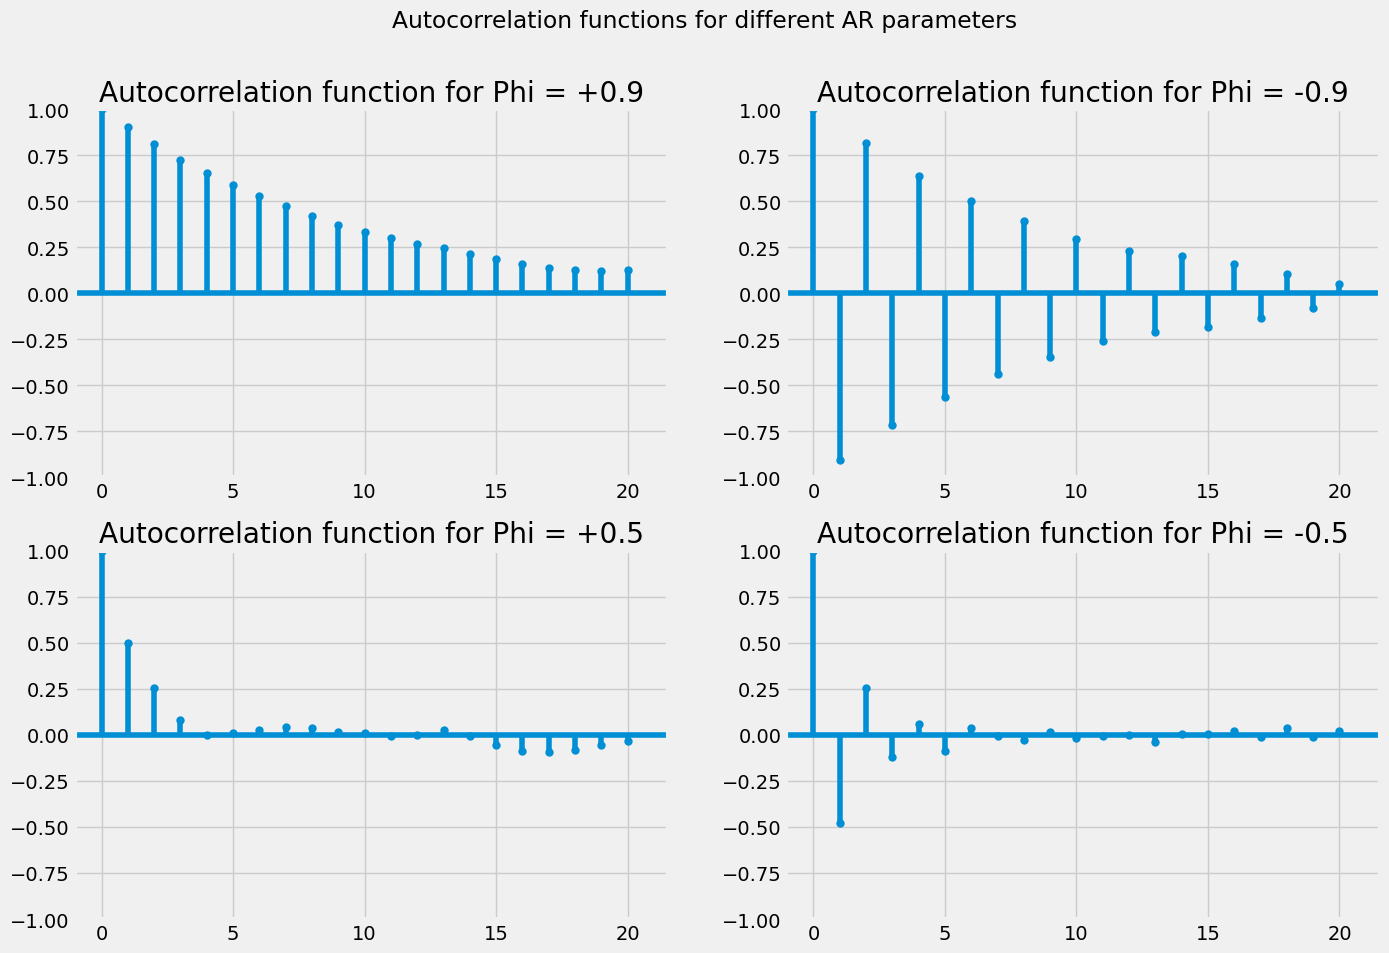

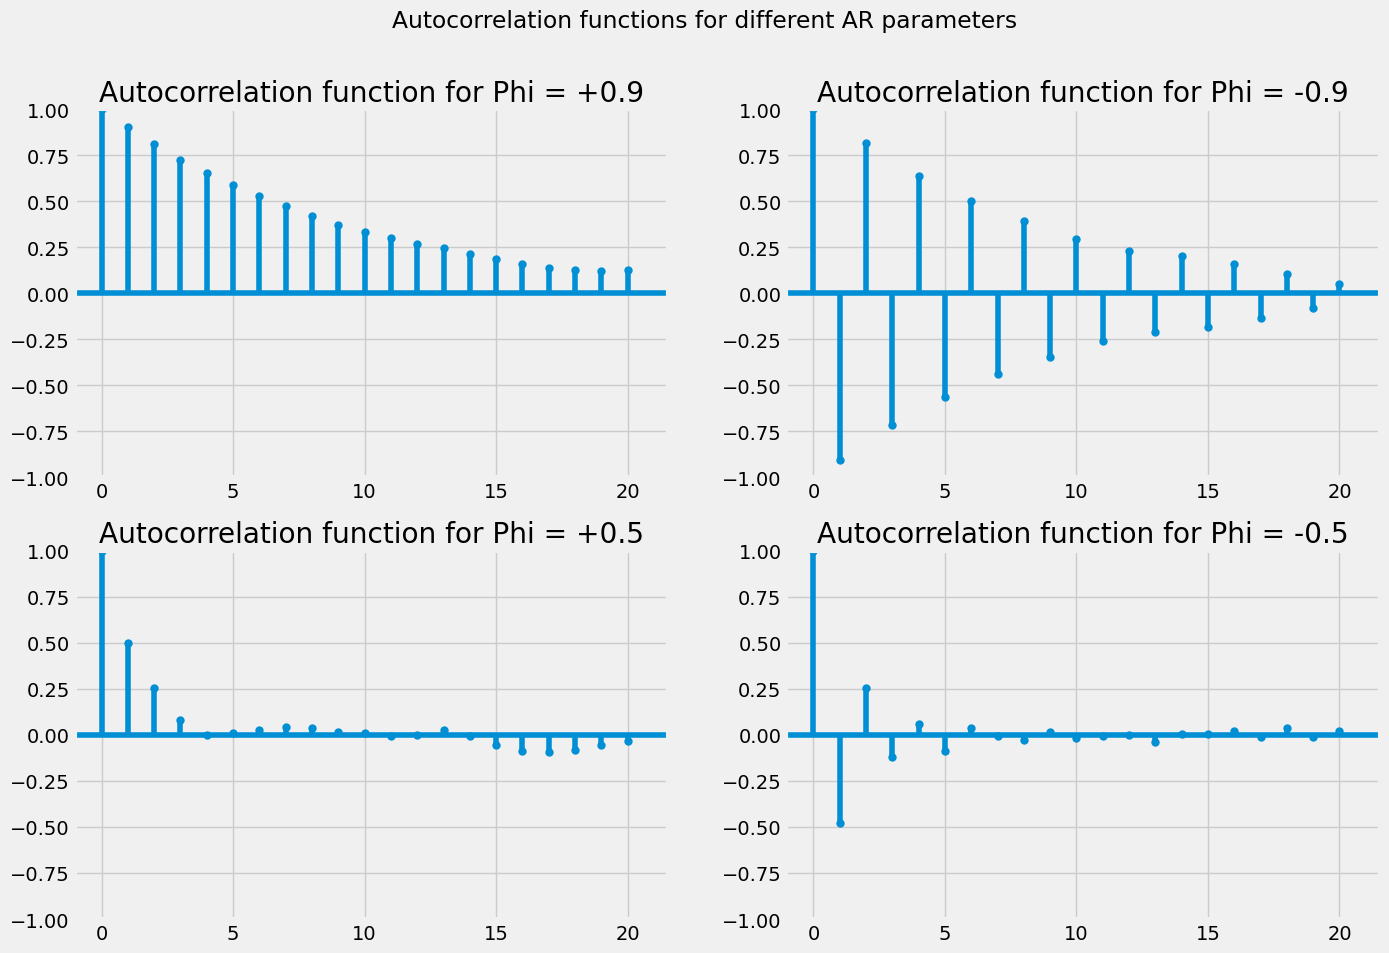

In [11]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Autocorrelation functions for different AR parameters')

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1 , alpha=1, lags=20, ax=axs[0,0], title='Autocorrelation function for Phi = +0.9')

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2 , alpha=1, lags=20, ax=axs[0,1], title='Autocorrelation function for Phi = -0.9')

# Plot 3: AR parameter = +0.5
plot_acf(simulated_data_3, alpha=1, lags=20,  ax=axs[1,0], title='Autocorrelation function for Phi = +0.5')

# Plot 4: AR parameter = -0.5
plot_acf(simulated_data_4, alpha=1, lags=20,  ax=axs[1,1], title='Autocorrelation function for Phi = -0.5')


If the phi is positive the autocorrelation function will decay exponentially at the rate of phi. This means that if phi is 0.9, then the autocorrelation at 1 is 0.9 and at 2 is (0.9)2 and at 3 is (0.9)3, and so on. If phi is negative then it will be the same but it will reverse its sign at each lag.


<a id="3.2"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 3.2.  Estimating & Forecasting AR Models</b></div>


To estimate the parameters of AR models for a time series we can use the ARIMA class as shown in the example below:



In [12]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data_1, order=(1,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1405.768
Date:                Sat, 30 Sep 2023   AIC                           2817.536
Time:                        10:15:32   BIC                           2832.259
Sample:                             0   HQIC                          2823.132
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1815      0.315     -0.576      0.565      -0.799       0.436
ar.L1          0.9011      0.014     65.923      0.000       0.874       0.928
sigma2         0.9724      0.040     24.310      0.0

The order (1,0,0) means you’re fitting the data to an AR(1) model. An order (2,0,0) would mean you’re fitting the data to an AR(2) model. The second and third parts of the order will be discussed in the next section.

The summary of the results is shown below. We can see that it is 0.91 which is similar to the phi parameter of the simulated data used in the previous subsection.



<a id="3.3"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 3.3.  Choosing the Right Model</b></div>


In the previous subsection, the order of the model was already known. However, in practice, this will not be given to you. There are different methods to determine the order of the AR model. We will focus on two of them: The Partial Autocorrelation Function, and the Information Criteria.

The partial autocorrelation function (PACF) measures the incremental benefits of adding another lag. To have a better understanding of PACF let's first define the partial autocorrelation. A partial autocorrelation is a description of the relationship between an observation in a time series and data from earlier time steps that do not take into account the correlations between the intervening observations. The correlation between observations at successive time steps is a linear function of the indirect correlations. These indirect connections are eliminated using the partial autocorrelation function.

Based on this definition of partial autocorrelation, The PACF indicates only the association between two data that the shorter lags between those observations do not explain. The partial autocorrelation for lag 3 is, for example, merely the correlation that lags 1 and 2 do not explain. ***In other words, the partial correlation for each lag is the unique correlation between the two observations after the intermediate correlations have been removed.***

To plot the PACF you can use the plot_pacf function from the statsmodels library as shown in the example below:

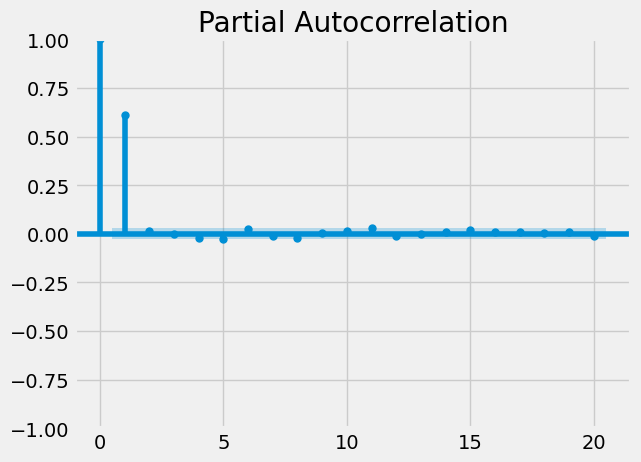

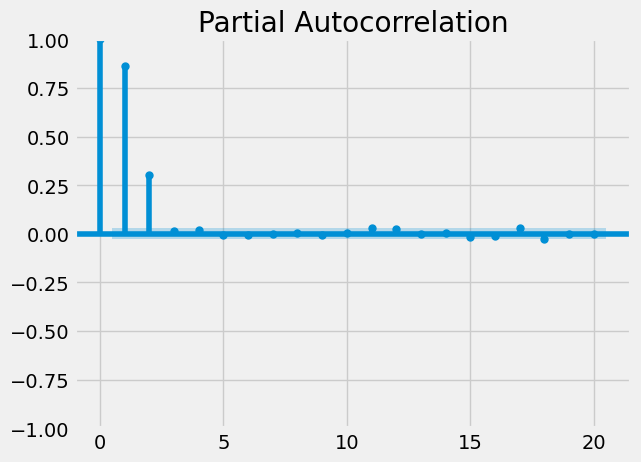

In [13]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

We generated two simulated data with AR(1) and AR(2), the figure above shows the PACF for both of them.

These plots show the Partial Autocorrelation Function for AR models of different orders. In the upper plot, for an AR(1) model, only the lag (1) PACF is significantly different from zero. Similarly, for an AR(2) model, two lags are different from zero.

If we applied the ARIMA function that we used in the previous subsection, to the simulated data used in the previous example and used the order of the model we got out of the PACF plot. We should get the same parameters from the function as the one used in generating the simulated data. In the example below we used the simulated data with AR(2) and phi of 0.6 and 0.3:



In [14]:
mod = ARIMA(simulated_data_2, order=(2,0,0))
result = mod.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7120.345
Date:                Sat, 30 Sep 2023   AIC                          14248.689
Time:                        10:15:33   BIC                          14274.758
Sample:                             0   HQIC                         14257.826
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1124      0.151      0.746      0.456      -0.183       0.408
ar.L1          0.6029      0.014     43.982      0.000       0.576       0.630
ar.L2          0.3027      0.014     22.083      0.0

The coefficients highlighted in yellow are phi_1 and phi_2, which are as expected 0.6 and 0.3.

The more parameters in a model, the better the model will fit the data. But this can lead the model to overfit the data. The information criteria adjust the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion (AIC) and the Bayesian Information Criterion(BIC).

The AIC is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables. BIC is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function, and it is closely related to AIC. When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. The BIC resolves this problem by introducing a penalty term for the number of parameters in the model. The penalty term is larger in BIC than in AIC.

In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion. This is shown in the example below:



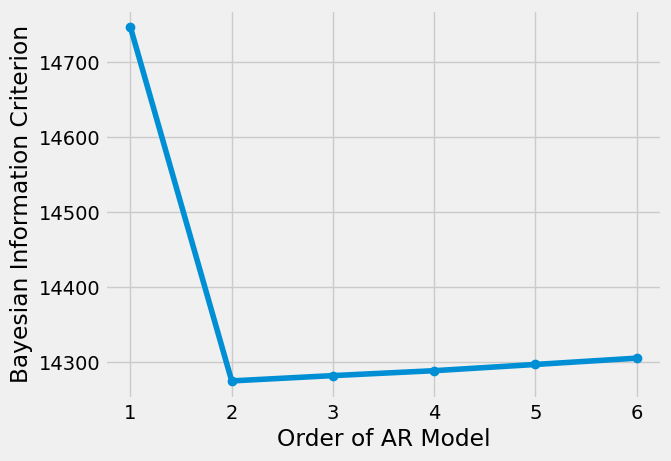

In [15]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

You can see that the lowest BIC occurs for an AR(2), which is what the simulated data was from.

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Moving Average and ARMA Models </b></div>




In this section, we will go through another kind of model, the moving average, or MA, model. We will also see how to combine AR and MA models into a powerful ARMA model.


<a id="4.1"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 4.1.  Moving Average Model Definition</b></div>

In the MA model, today's values equal a mean plus noise, plus a fraction of theta of yesterday's noise. This is shown in the following equation:

R(t) = Mean + noise + theta* (yesterday-noise)

This is called an MA model of order 1, or simply an MA(1) model as we take into consideration only yesterday's noise, if we look for two previous days it will be MA(2), and so on. If the MA parameter, theta, is zero, then the process is white noise. MA models are stationary for all values of theta.

Suppose R(t) is a time series of stock returns. If theta is negative, then a positive shock last period, represented by epsilon(t-1), would have caused the last period’s return to be positive, but this period’s return is more likely to be negative. A shock two periods ago would have no effect on today’s return — only the shock now and last period.

To create simulated data from the MA model we can use ArmaProcess from the statsmodels library as shown in the example below:



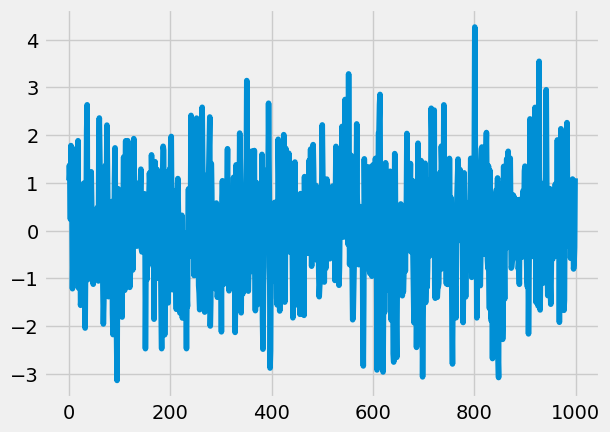

In [16]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)


<a id="4.2"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 4.2.  Estimation of MA Model</b></div>


To estimate the MA model from given time series, we can use the same method as in estimating the AR model shown before in section 3.2. We will use the ARIMA function, but the order will be (0,0,1) instead of (1,0,0). An example of this is shown below:



In [17]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1389.371
Date:                Sat, 30 Sep 2023   AIC                           2784.741
Time:                        10:15:42   BIC                           2799.465
Sample:                             0   HQIC                          2790.337
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0359      0.047      0.766      0.444      -0.056       0.128
ma.L1          0.5253      0.028     18.856      0.000       0.471       0.580
sigma2         0.9423      0.040     23.664      0.0

The result agrees with our expectation as the parameter used for generating the simulation data was 0.


<a id="4.3"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> 4.3.  ARMA Models</b></div>



An ARMA model is a combination of both the AR and MA models. Here is the formula of the ARMA(1,1) model:

R(t) = Mean + theta * Noise(t-1) + phi* R(t-1) + Noise(t)

<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5. Case Study: Climate Change </b></div>


Let's put all the concepts covered in this article together through the climate change case study. We will analyze some temperature data taken over almost 150 years. The data was downloaded from the NOAA website.

### The following steps will be done:

1. Apply pandas methods by converting the index to DateTime and plotting the data.

2. Apply the Augmented Dickey-Fuller test to see whether the data is a Random Walk.

3. Take the first differences in the data to transform it into a stationary series

4. Compute the Autocorrelation Function and the Partial Autocorrelation Function of the data.

5. Fit AR, MA, and ARMA models to the data.

6. Use the Information Criterion to choose the best model among the ones you looked at.

7. Finally, with the best model, forecast temperatures over the next 30 years.

The first two steps are done with the code below:

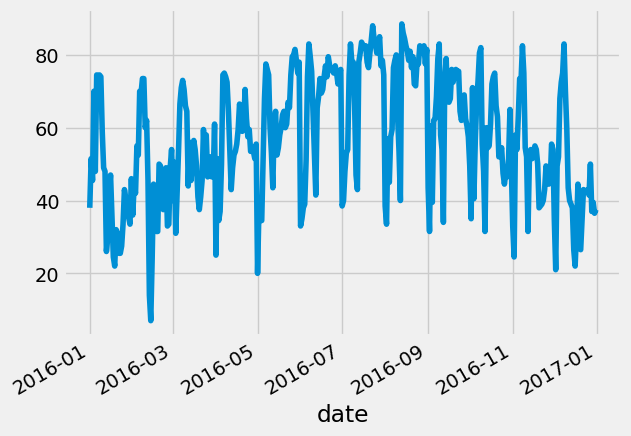

The p-value for the ADF test is  0.722327397186241


In [18]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

#upload the data 
temp_NY = pd.read_csv('/kaggle/input/weather-data-in-new-york-city-2016/weather_data_nyc_centralpark_2016(1).csv', parse_dates=['date'], index_col='date' )

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='mixed')

# Plot average temperatures
temp_NY['average temperature'].plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['average temperature'])
print("The p-value for the ADF test is ", result[1])


The p-value of the ADF test is 0.72, which means that the time series is not stationary and we cannot reject that it is a random walk.

The third and fourth steps are applied to the data using the code below:



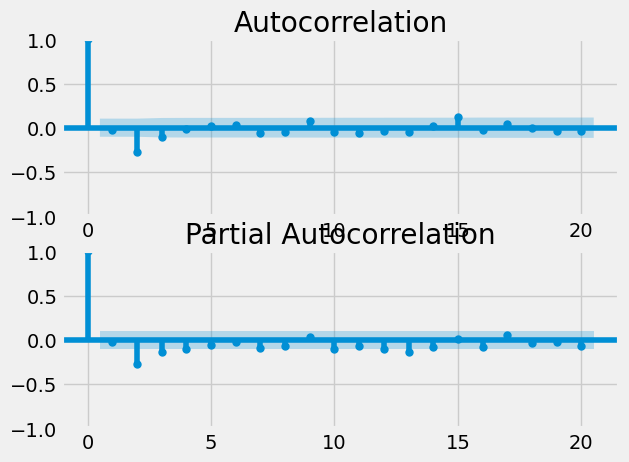

In [19]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY['average temperature'].diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()


There is no clear pattern in the ACF and PACF except for the negative lag-1 autocorrelation in the ACF.

After that, the data three models will be fitted to the data and the AIC is calculated for each model. This is done using the code below:



In [20]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1,0,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2,0,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)


The AIC for an AR(1) is:  2358.918557229653
The AIC for an AR(2) is:  2331.9914146253486
The AIC for an ARMA(1,1) is:  2323.4757201375196


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsm

The ARMA(1,1) has the lowest AIC values among the three models. Therefore it will be used for parameters estimation and forecasting.

# References
[1]. https://app.datacamp.com/learn/courses/time-series-analysis-in-python

[2]. https://www.statisticshowto.com/autoregressive-model/

[3]. https://analyticsindiamag.com/what-are-autocorrelation-and-partial-autocorrelation-in-time-series-data/

[4]. https://www.scribbr.com/statistics/akaike-information-criterion/

[5]. https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6

